

# Configuration models

**Configuration models** are models of random graphs with a given degree sequence.

From a mathematical perspective, the idea of a configuration model is elegant and flexible. However, sampling from these models can be challenging and subtle. There are two primary strategies for thinking about configuration models.

## Types of configuration models

Similar to $G(n,p)$ models, we can understand a configuration model by understanding what is fixed (and what is random).

One way to set up a configuration model is to fix a degree sequence $\{k_1, \dots, k_n\}$. Note that this also fixes the number of edges:
$$
    m = \frac{1}{2} \sum_j k_j \,.
$$

::: {.callout-note icon=false appearance="minimal"}
::: {#def-config-model-sequence}

Consider a graph with $n$ nodes. Let ${\bf k} \in \mathbb{N}^n$ be the degree sequence, where $k_i$ is the degree of node $i$.

A **configuration model** is a uniform distribution over graphs with degree sequence ${\bf k}.$

:::
:::

The classic algorithmic strategy for sampling from such a configuration model is through *stub-matching*. Recall that each edge has two ends of edges, or *stubs*. This means that node $i$ has $k_i$ stubs.

1. Choose two stubs uniformly at random and connect these stubs to form an edge.
2. Choose another pair from the remaining unmatched stubs; repeat the process until all stubs are matched.

[[7, 17], [0, 1], [9, 20], [1, 19], [2, 32], [32, 1], [10, 5], [29, 32], [1, 0], [13, 26], [0, 31], [13, 0], [33, 0], [2, 5], [33, 23], [31, 6], [28, 6], [33, 23], [8, 13], [33, 30], [28, 14], [8, 0], [13, 20], [25, 1], [32, 15], [29, 6], [32, 25], [30, 33], [32, 25], [33, 4], [27, 7], [33, 3], [6, 0], [4, 18], [33, 23], [18, 2], [24, 22], [31, 2], [29, 27], [0, 1], [3, 0], [33, 23], [3, 32], [1, 0], [31, 8], [33, 24], [2, 30], [22, 12], [0, 32], [31, 0], [32, 26], [29, 7], [2, 11], [10, 2], [2, 3], [9, 33], [32, 16], [2, 32], [13, 8], [28, 32], [14, 7], [0, 3], [15, 1], [33, 17], [12, 16], [27, 19], [0, 19], [21, 31], [8, 4], [24, 27], [33, 0], [2, 33], [0, 5], [23, 5], [33, 3], [1, 30], [33, 10], [21, 33]]


[Text(0.5, 1.0, 'Configuration Model Graph')]

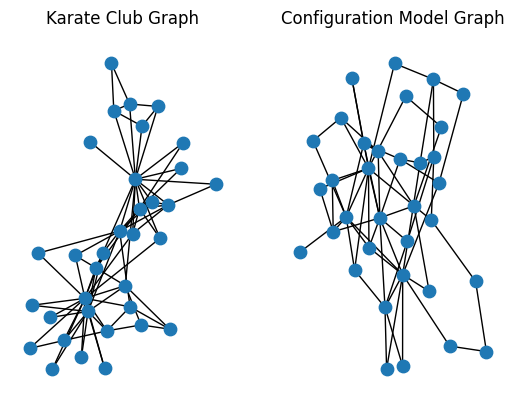

In [31]:
from typing_extensions import ParamSpecKwargs

import networkx as nx
import numpy as np

from matplotlib import pyplot as plt

import random

fig, axarr = plt.subplots(1, 2)
axarr[0].set(title = "Karate Club Graph")

G_Karate = nx.karate_club_graph()

nx.draw(G_Karate, ax = axarr[0], node_size = 80)

## Follow the steps below to create a stub-matching algorithm for a configuration model based on the Karate Club Graph.

# Get degree sequence for Karate club graph
tot_degrees = (G_Karate.number_of_edges()) * 2
k = [p for n,p in G_Karate.degree()]
# k = nx.degree(G_Karate)

stub_list = []
for i in range(len(k)):
  for j in range(k[i]):
    stub_list += [i]
#print(stub_list)
# Create new edgelist via stub matching algorithm
edge_list = []

for iter in range(tot_degrees // 2):
  stub1 = random.choice(stub_list)
  stub_list.remove(stub1)
  stub2 = stub1
  while stub2 == stub1:
    stub2 = random.choice(stub_list)
  stub_list.remove(stub2)

  # adding to edge_list
  edge_list += [[stub1, stub2]]


print(edge_list)



# Create a network G from your edgelist
G = nx.from_edgelist(edge_list)

# Visualize our configuration model graph
nx.draw(G, node_size = 80)
axarr[1].set(title = "Configuration Model Graph")

The stub-matching algorithm can produce multiedges and self-loops, which can cause the graph to not be simple. However, @bollobas1980probabilistic proved that, when the graph is sparse, the expected number of multi-edges and self-loops does not grow with network size. One can, as a result, show these structures are rare, and can often be ignored in arguments. Another challenge with this algorithm is we require an even number of stubs to get a graph realization that exactly matches the degree sequence; although in practice if we are working from an empirical network this should not be a problem.

@fosdick2018configuring discuss the subtleties that arise due to whether we allow or disallow multiedges and self-loops and whether we choose to label stubs distinctly (as opposed to only labeling vertices). These choices result in different spaces of graphs from which we are sampling.

### Fixing a degree distribution

When making mathematical arguments, you may want to sample from a particular degree distribution $p_k$ instead of sampling graphs with a particular degree sequence $k$.

We can do this using a slight modification to the strategy described above.

1. Draw a degree sequence $\{k_i\}$ from the given distribution $p_k.$
    - In practice, this is most likely achieved by $n$ independent draws from $p_k$. A particular degree sequence then appears with probability $\Pi_i p_{k_i}.$
2. Construct a graph with this degree sequence by proceeding via stub matching as described above.

Once again, we can easily run into some challenges here. With the algorithm described above it is very possible to generate a degree sequence with an odd number of stubs, and such degree sequences would need to be discarded. The concerns about self-edges, multiedges, and labeling still apply.

While the two models we describe here are different, we expect them to behave similarly in the large-$n$ limit, where a sequence drawn from a degree distribution more accurately captures the underlying distribution.

There are some important special cases that we've already encountered:

- Using a Poisson degree distribution nearly recovers the $G(n,p)$ model, excepting that we are able to generate self- and multiedges with this configuration model variant.
- Using a power-law degree distribution helps us mathematically study the properties of scale-free networks, like those generated by preferential attachment.

### Fixing a degree sequence in expectation (Chung--Lu model)

Some of the challenges with stub-matching arise from the requirement that we generate a graph with a specified degree sequence ${\bf k}.$ @chung2002connected relax this constraint and generate networks whose degree sequences are ${\bf k}$ in expectation, which avoids some of these issues.

Consider two nodes $i$ and $j$ with degress $k_i$ and $k_j$ respectively. From the perspective of node $i$, the total number of stubs it could connect to is $2m-k_i$ (if we exclude the possibility of self-loops). Thus,
$$
    \mathbb{P}(\text{node $i$ stub connects to node $j$}) = \frac{k_j}{2m-k_i}.
$$

Assuming that our network is large and sparse, we expect the argument above to hold independently for each stub of $i$. Defining $\mathbb{P}_{ij}$ as the probability the node $i$ is connected to node $j$, we have

$$
    \mathbb{P}_{ij} = k_i \left( \frac{k_j}{2m-k_i} \right) \approx \frac{k_ik_j}{2m}\,.
$$

We might notice that this feels a little similar to the $G(n,p)$ model, and in fact, this is by construction. The degree of node $i$ will be Poisson distributed with mean $k_i$ under the assumptions given above. [Another assumption required here is that the maximum degree is not too large.]{.aside} This means that, instead of stub-matching, we can use an algorithm like for a $G(n,p)$ network by placing an edge between two nodes with probability $\mathbb{P}_{ij}$.

## Excess Degree Distribution

Consider a configuration model with degree distribution $p_k$ (so a fraction $p_k$ of nodes have degree $k$). This means that $p_k$ can be viewed as the probability that a node chosen uniformly at random from our network has degree $k$.

Now, suppose we choose a node uniformly at random and follow an edges to this node's neighbor (if it has one). What is the probability that the neighbor will have degree $k$?

::: {.callout-warning}

## Exercise

Explain why the probability that the neighbor has degree $k$ is **not** also $p_k.$

:::

::: {.hide .solution}

Note that using this process, we are only able to select nodes that have neighbors. This is not necessarily all of our nodes in the graph! For example, the probability of selecting a node uniformly at random with degree 0 is $p_0$, but the probability that a neighbor of a node has degree 0 is 0.

:::

First, let's calculate the probability that we have a stub connected to a particular degree $k$ node. A node with degree $k$ has $k$ stubs, and there are $2m-1$ possible stubs.

$$
    \mathbb{P}(\text{edge ends at particular degree $k$ node}) = \frac{k}{2m-1} \,.
$$

Thus, because in expectation there are $np_k$ nodes of degree $k$, we have

$$
    \mathbb{P}(\text{edge ends at any degree $k$ node}) = \frac{k}{2m-1}n p_k \approx \frac{k}{2m}np_k \,.
$$

Noting that our mean degree is $c = \frac{2m}{n},$ we have that the probability that we reach a node of degree $k$ is approximately $\frac{1}{c}k p_k.$ In other words, this probability is proportional to $kp_k$ (not $p_k$ as we might expect).

### The Friendship Paradox

Suppose we model a social network of friends with a configuration model. How many friends does your friend have?

To see this, let's calculate the average degree of a neighbor of a randomly chosen node:

$$
    \sum_k k \frac{1}{c}kp_k = \frac{\langle k^2 \rangle}{c}\,.
$$
where $\langle k^2 \rangle = \frac{1}{n} \sum_i k_i^2$.

Let's compare this value to the expected degree of a randomly chosen node:

$$
    \frac{\langle k^2 \rangle}{c} - c = \frac{1}{c}\left(\langle k^2 \rangle - c^2\right) = \frac{\sigma_k^2}{c}\,,
$$
where $\sigma_k^2$ is the variance of the degree distribution.

Unless we have a $k$-regular network, $\sigma_k^2 >0.$ Thus,

\begin{align}
    \frac{\sigma_k^2}{c} &> 0, \\
    \Rightarrow \frac{\langle k^2 \rangle}{c} - c &> 0, \\
    \Rightarrow \frac{\langle k^2 \rangle}{c} > c \,.
\end{align}

That is, the expected degree of a node's neighbor is greater than the expected node degree $c$ ... in other words, your friends have more friends than you do!

The intuition behind this idea is that a node with degree $k$ appears as a neighbor to $k$ other nodes, so high degree nodes are over-represented in the calculations.

## References
